In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df[df['SepalWidthCm'] > 4.0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [5]:
df[df['PetalWidthCm'] > 1.0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df[df['PetalWidthCm'] > 2.0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


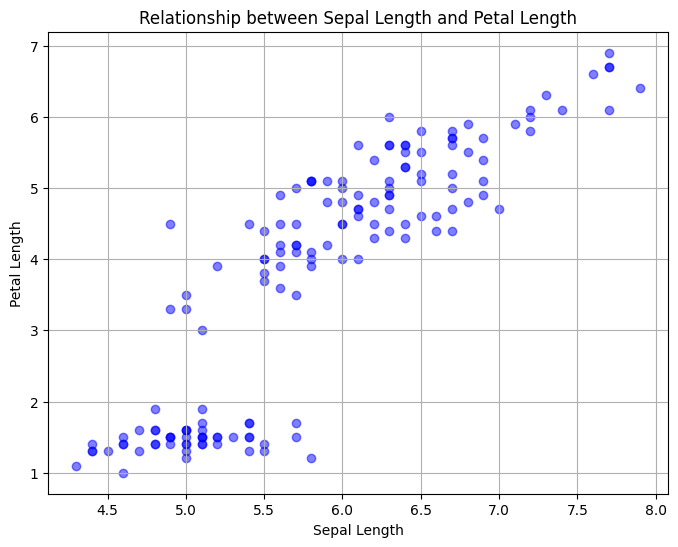

In [7]:
sepal_length = df['SepalLengthCm']
petal_length = df['PetalLengthCm']
species = df['Species']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(sepal_length, petal_length, color='blue', alpha=0.5)
plt.title('Relationship between Sepal Length and Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.grid(True)
plt.show()

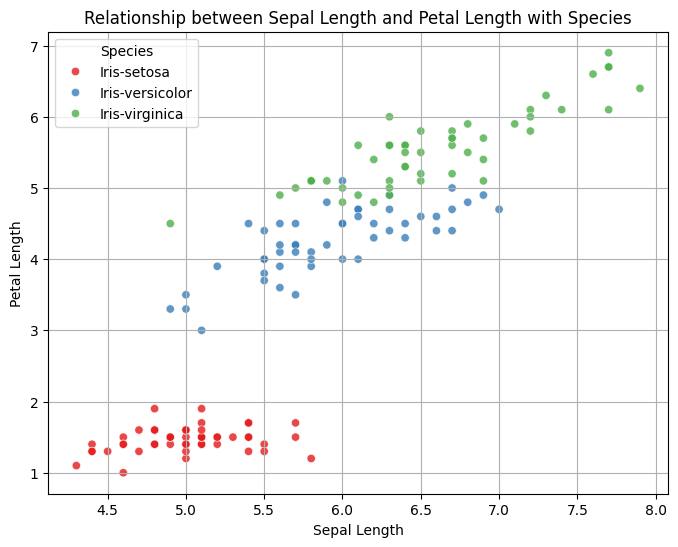

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= sepal_length, y=petal_length, hue=species, palette='Set1', alpha=0.8)
plt.title('Relationship between Sepal Length and Petal Length with Species')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.grid(True)
plt.legend(title='Species')
plt.show()

In [9]:
#Model One
y = df['SepalLengthCm']
x = df['SepalWidthCm']


# Split the data into training and testing sets
x_train, x_test = train_test_split(x, test_size=0.3, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Print the shapes of the training and testing datasets
print("X Training dataset shape:", x_train.shape)
print("X Testing dataset shape:", x_test.shape)
print("Y Training dataset shape:", x_train.shape)
print("Y Testing dataset shape:", x_test.shape)


X Training dataset shape: (105, 1)
X Testing dataset shape: (45, 1)
Y Training dataset shape: (105, 1)
Y Testing dataset shape: (45, 1)


In [14]:
#printing first 5 values of the training and testing datasets
print(x_train[0:5])
print(y_train[0:5])
print(x_test[0:5])
print(y_test[0:5])

[[2.4]
 [2.8]
 [3.1]
 [3. ]
 [3.6]]
[[5.5]
 [6.3]
 [6.4]
 [6.6]
 [7.2]]
[[2.8]
 [3.8]
 [2.6]
 [2.9]
 [2.8]]
[[6.1]
 [5.7]
 [7.7]
 [6. ]
 [6.8]]


In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [58]:
print(y_pred[:5])
print(y_test[:5])

[[5.85110621]
 [5.81082008]
 [5.85916343]
 [5.84707759]
 [5.85110621]]
[[6.1]
 [5.7]
 [7.7]
 [6. ]
 [6.8]]


In [59]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.6567821569540032


In [61]:
#Model 2
#Predicting Sepal Length using Sepal Width, Petal Length, and Petal Width

y = df['SepalLengthCm']
x = df[['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Mean squard error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09829242456668906


In [66]:
#Second model has a much lower mse value and is therefore a better model
#The First model had much less features and therefore was not as accurate as the second model

In [71]:
#Logistic Regression Model for identifying species
y = df['Species']
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit both train set into fit method of Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Instantiate Logistic Regression model
log_reg.fit(x_train, y_train)

# Predict x_test and store result into y_pred using predict method
y_pred = log_reg.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#The accuracy of the model is 1.0 which is a perfect score



Accuracy: 1.0
x_train:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
81             5.5           2.4            3.7           1.0
133            6.3           2.8            5.1           1.5
137            6.4           3.1            5.5           1.8
75             6.6           3.0            4.4           1.4
109            7.2           3.6            6.1           2.5
..             ...           ...            ...           ...
71             6.1           2.8            4.0           1.3
106            4.9           2.5            4.5           1.7
14             5.8           4.0            1.2           0.2
92             5.8           2.6            4.0           1.2
102            7.1           3.0            5.9           2.1

[105 rows x 4 columns]
y_train:
81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-